In [4]:
import pandas as pd

# Change path to your file
EXCEL_PATH = "C:\\Users\\Aman Bisen\\Desktop\\11dataset_youtube-comments-scraper_2025-09-26_07-30-07-558.xlsx"

# Load the Excel file (shows sheets if multiple)
xls = pd.ExcelFile(EXCEL_PATH, engine='openpyxl')
print("Sheets:", xls.sheet_names)

# Load the first sheet by default; change sheet_name if needed
df = pd.read_excel(EXCEL_PATH, sheet_name=xls.sheet_names[0], engine='openpyxl')

# Display first 10 rows and shape of the dataframe
print(df.head(10))
print("Shape of DataFrame:", df.shape)

Sheets: ['Data']
                                             comment
0  The United States is one of the only wealthy n...
1  Nah.... watching this almost through 2025 is s...
2  only way to accomplish this is to kill 80% of ...
3  As long as Capitalist is the norm, some SDG is...
4  A decade has passed, and the world is in a wor...
5  A visionary reminder that true sustainability ...
6  Pure mobbing. Theese people are crazy and psyc...
7                Watching this in 2025 is so painful
8  Individuals or each Household should have know...
9  This is the most dangerous agenda that has eve...
Shape of DataFrame: (576, 1)


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: Verify These Variables ---
# Correct raw string for Windows file path
input_file_name = r"C:\Users\Aman Bisen\Desktop\11dataset_youtube-comments-scraper_2025-09-26_07-30-07-558.xlsx"

# Name of the column with cleaned text
column_to_analyze = 'comment'

# Number of topics to extract
num_topics = 5

def display_topics(model, feature_names, num_top_words):
    """Print the topics in a readable format."""
    for topic_idx, topic in enumerate(model.components_):
        top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_word_indices]
        print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

try:
    # Load the Excel file
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'. Shape: {df.shape}")

    # Check if the column exists
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")

    # Remove missing values and ensure strings
    df.dropna(subset=[column_to_analyze], inplace=True)
    df[column_to_analyze] = df[column_to_analyze].astype(str)

    if df.empty:
        raise ValueError("No data available after removing missing values.")

    text_data = df[column_to_analyze]
    print(f"Performing topic modeling on {len(text_data)} comments...")

    # Vectorize text
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    # Fit NMF model
    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda')
    nmf_model.fit(tfidf_matrix)

    # Display topics
    print("\n--- Discovered Topics ---")
    display_topics(nmf_model, tfidf_feature_names, 10)

except FileNotFoundError:
    print(f"File not found: '{input_file_name}'. Please check the path.")

except KeyError as e:
    print(f"Column error: {e}")
    print("Available columns:", df.columns.tolist())

except ValueError as ve:
    print(f"ValueError: {ve}")

except Exception as e:
    print(f"Unexpected error: {e}")


Successfully loaded 'C:\Users\Aman Bisen\Desktop\11dataset_youtube-comments-scraper_2025-09-26_07-30-07-558.xlsx'. Shape: (576, 1)
Performing topic modeling on 571 comments...

--- Discovered Topics ---
Topic #1: paris abrahamic agreement accords emmanuel macron france bank great 10
Topic #2: thank sir informative talk presentation excellent interesting session lecture video
Topic #3: better place make talk world 2030 excellent good interesting sir
Topic #4: nice information session presentation talk ted vision lecture perspective interesting
Topic #5: people goals global world like don just hoax communist slave


Successfully loaded 'C:\Users\Aman Bisen\Desktop\11dataset_youtube-comments-scraper_2025-09-26_07-30-07-558.xlsx'. Shape: (576, 1)
Performing topic modeling on 571 entries...

--- Discovered Topics ---
Topic #1: paris abrahamic agreement accords emmanuel macron france bank great 10
Topic #2: thank sir informative talk presentation excellent interesting session lecture video
Topic #3: better place make talk world 2030 excellent good interesting sir
Topic #4: nice information session presentation talk ted vision lecture perspective interesting
Topic #5: people goals global world like don just hoax communist slave


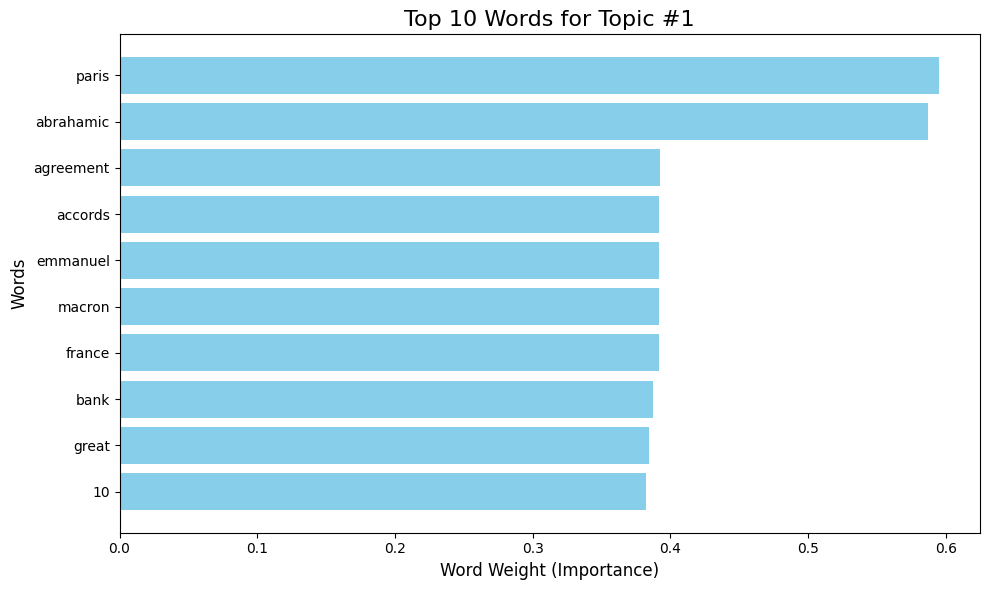

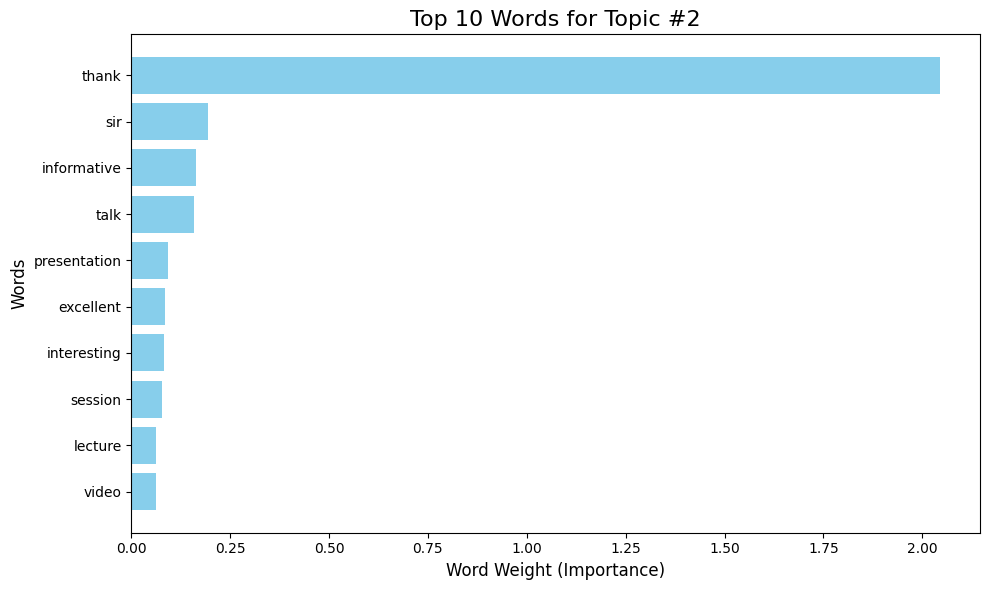

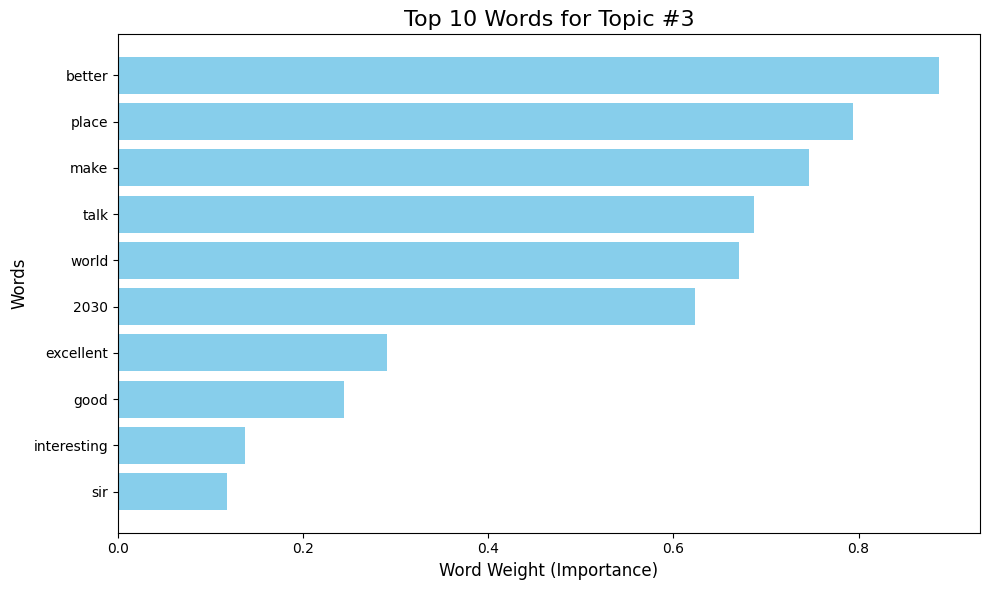

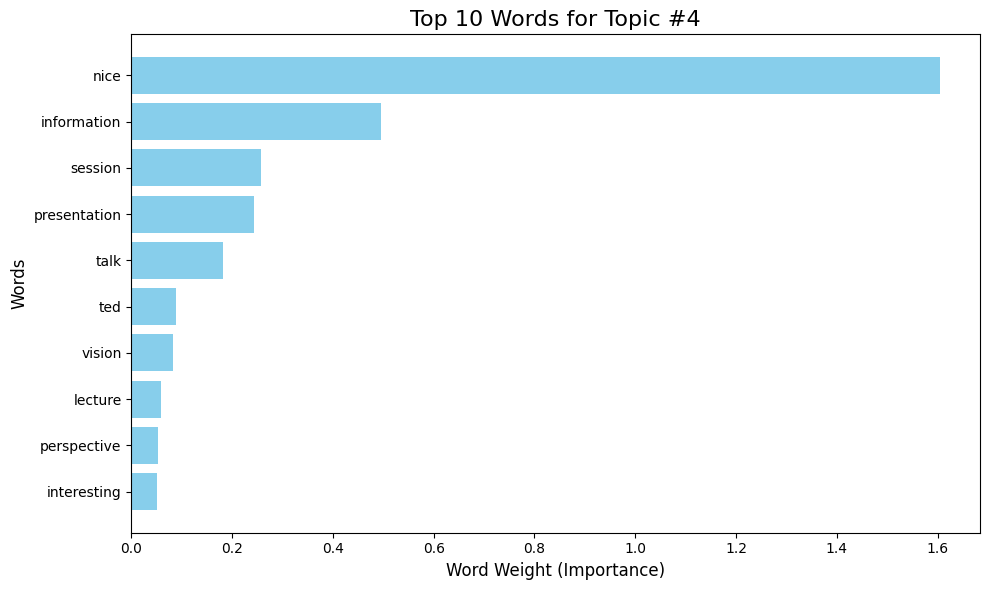

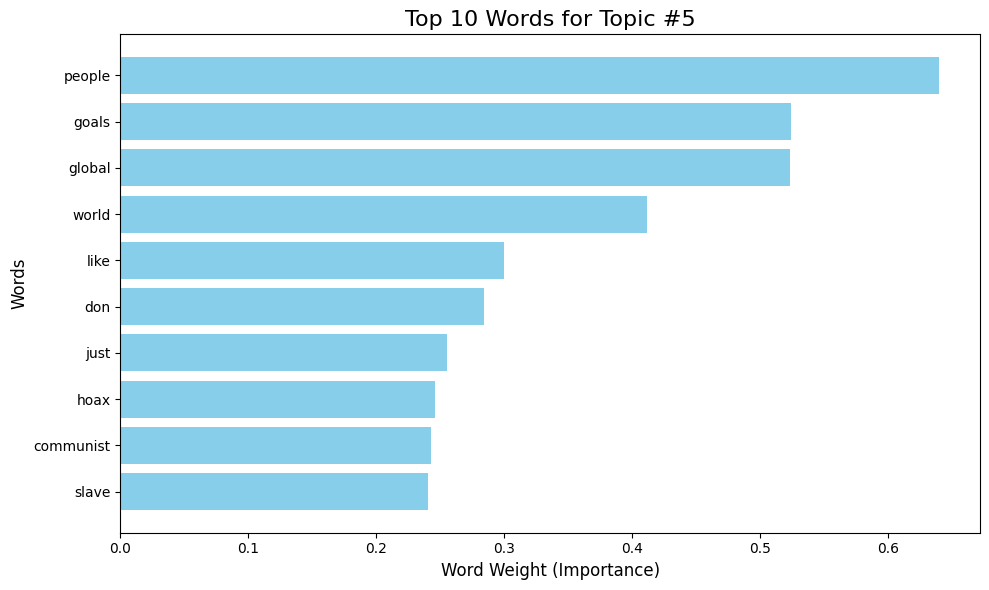

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: Configuration ---
# Path to your Excel file
input_file_name = r"C:\Users\Aman Bisen\Desktop\11dataset_youtube-comments-scraper_2025-09-26_07-30-07-558.xlsx"

# Column containing cleaned text
column_to_analyze = 'comment'

# Number of topics and top words to display
num_topics = 5
num_top_words = 10

# --- Step 2: Helper function to display topics ---
def display_topics(model, feature_names, num_top_words):
    """Prints top words for each topic."""
    for topic_idx, topic in enumerate(model.components_):
        top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_word_indices]
        print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

# --- Step 3: Main Processing ---
try:
    # Load Excel data
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'. Shape: {df.shape}")

    # Validate column
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found.")
    
    # Clean data
    df.dropna(subset=[column_to_analyze], inplace=True)
    text_data = df[column_to_analyze].astype(str)
    if text_data.empty:
        raise ValueError("No text data available after cleaning.")

    print(f"Performing topic modeling on {len(text_data)} entries...")

    # --- Step 4: Vectorize text ---
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    # --- Step 5: Fit NMF model ---
    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda')
    nmf_model.fit(tfidf_matrix)

    # --- Step 6: Display topics in console ---
    print("\n--- Discovered Topics ---")
    display_topics(nmf_model, tfidf_feature_names, num_top_words)

    # --- Step 7: Plot top words for each topic ---
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [tfidf_feature_names[i] for i in top_word_indices]
        top_weights = [topic[i] for i in top_word_indices]

        plt.figure(figsize=(10, 6))
        plt.barh(top_words, top_weights, color='skyblue')
        plt.gca().invert_yaxis()  # Most important word on top
        plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
        plt.xlabel('Word Weight (Importance)', fontsize=12)
        plt.ylabel('Words', fontsize=12)
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---\nPlease check path: {input_file_name}")
except KeyError as e:
    print(f"--- ERROR: Column Not Found ---\n{e}")
    print("Available columns:", df.columns.tolist())
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Successfully loaded 'C:\Users\Aman Bisen\Desktop\11dataset_youtube-comments-scraper_2025-09-26_07-30-07-558.xlsx'.
Running topic modeling...
Topic modeling complete. Generating word clouds...


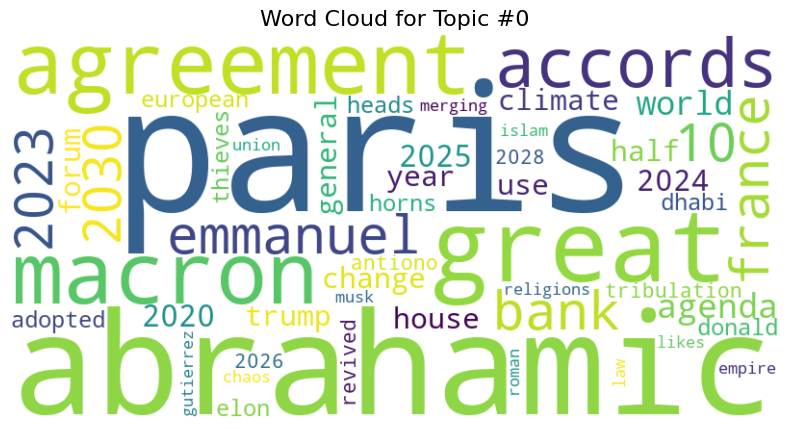

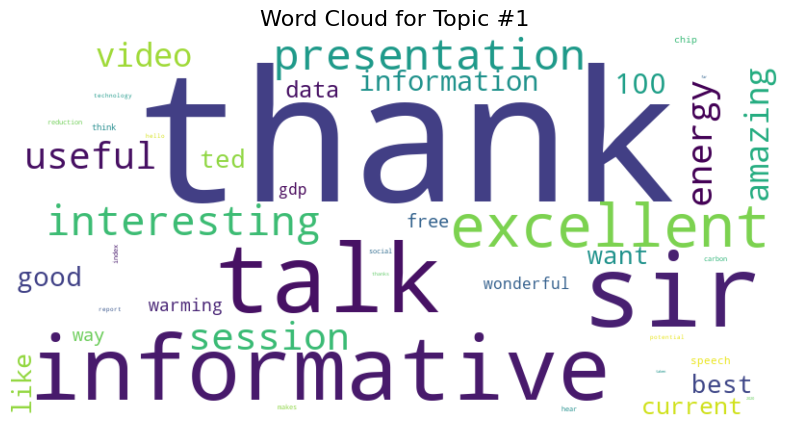

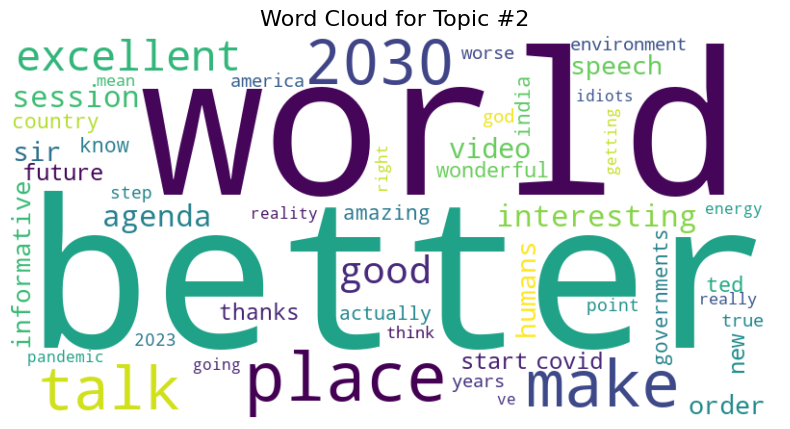

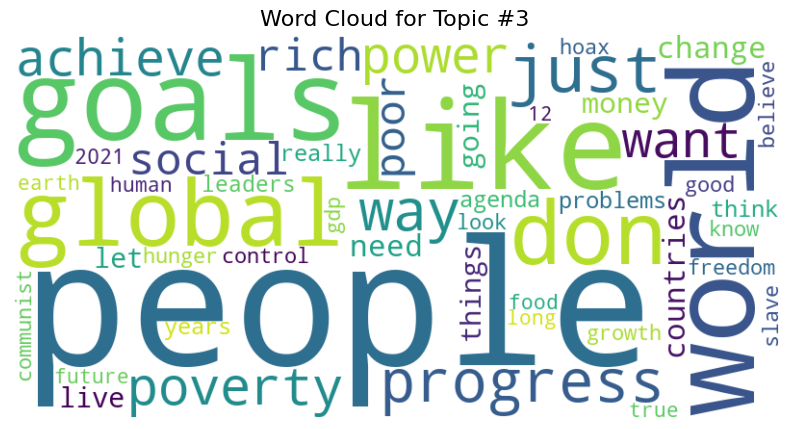

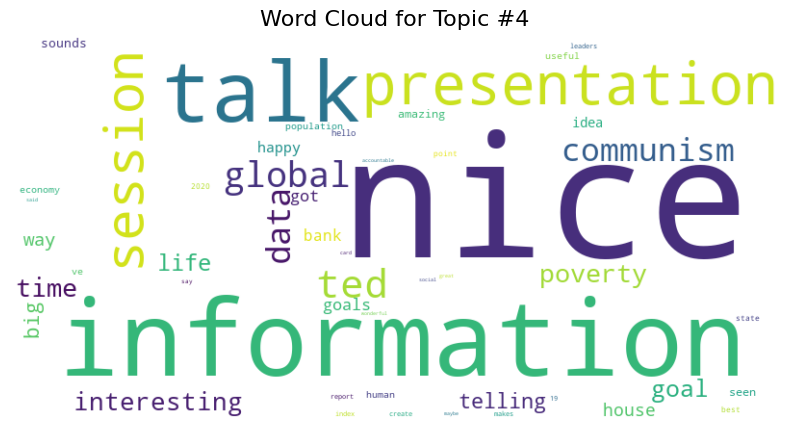

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# --- Step 1: Configuration ---
# This MUST be the exact name of your Excel file with sentiment data.
input_file_name = r"C:\Users\Aman Bisen\Desktop\11dataset_youtube-comments-scraper_2025-09-26_07-30-07-558.xlsx"

# This MUST be the exact name of the column with cleaned text.
column_to_analyze = 'comment'

# The number of topics you want to find.
num_topics = 5


try:
    # --- Step 2: Load and Prepare Data ---
    df = pd.read_excel(input_file_name)
    print(f"Successfully loaded '{input_file_name}'.")

    # Validate and clean the data
    if column_to_analyze not in df.columns:
        raise KeyError(f"The column '{column_to_analyze}' was not found in your file.")
    df.dropna(subset=[column_to_analyze], inplace=True)
    text_data = df[column_to_analyze].astype(str)
    if text_data.empty:
        raise ValueError("The text data is empty after cleaning. Cannot proceed.")

    # --- Step 3: Vectorize and Run NMF (same as before) ---
    print("Running topic modeling...")
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    nmf_model = NMF(n_components=num_topics, random_state=42, init='nndsvda').fit(tfidf_matrix)
    print("Topic modeling complete. Generating word clouds...")

    # --- Step 4: Generate a Word Cloud for Each Topic ---

    # Get the vocabulary (list of words) from the vectorizer
    words = tfidf_vectorizer.get_feature_names_out()

    for topic_idx, topic in enumerate(nmf_model.components_):
        # Create a dictionary of words and their weights for the current topic
        # The WordCloud object expects frequencies, so we'll use the NMF component weights
        topic_words = {words[i]: topic[i] for i in topic.argsort()[:-51:-1]} # Get top 50 words

        # Create the WordCloud object
        wordcloud = WordCloud(width=800,
                              height=400,
                              background_color='white',
                              colormap='viridis').generate_from_frequencies(topic_words)

        # --- Plot the Word Cloud ---
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Topic #{topic_idx}', fontsize=16)
        plt.axis('off') # Hide the axes
        plt.show()


except FileNotFoundError:
    print(f"--- ERROR: File Not Found ---")
    print(f"The file named '{input_file_name}' was not found.")
except KeyError as e:
    print(f"--- ERROR: Column Not Found ---")
    print(f"{e}")
    print("\nHere are the actual column names in your file:")
    print(pd.read_excel(input_file_name).columns.tolist())
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
import pandas as pd
from collections import Counter
import re

# --- Load your data ---
df = pd.read_excel("bitcoin_13.xlsx")  # Replace with your file

# Ensure the column exists
text_column = "comment"
if text_column not in df.columns:
    raise KeyError(f"Column '{text_column}' not found. Available columns: {df.columns.tolist()}")

# Combine all text into a single list of words
all_text = ' '.join(df[text_column].dropna().astype(str))
all_words = all_text.split()  # Split into individual words

# ------------------- Bigrams -------------------
bigrams_list = [tuple(all_words[i:i+2]) for i in range(len(all_words)-1)]
bigram_freq = Counter(bigrams_list)

print("=== Top 20 Bigrams ===")
for bg, freq in bigram_freq.most_common(20):
    print(f"{' '.join(bg)}: {freq}")

# ------------------- Trigrams -------------------
trigrams_list = [tuple(all_words[i:i+3]) for i in range(len(all_words)-2)]
trigram_freq = Counter(trigrams_list)

print("\n=== Top 20 Trigrams ===")
for tg, freq in trigram_freq.most_common(20):
    print(f"{' '.join(tg)}: {freq}")
